# Master Data Science and Business Analytics - Exam: Machine Learning

### Directions

Fill the empty code cells in order to implement the described tasks and reproduce the given output.

A slight difference of your output in values and number of rows does not affect a positive evaluation

The program must be _reproducible_: repeated executions must give the same results  

### Workflow
1. load the data in memory
1. drop the useless data
1. separe the predicting attributes X from the class attribute y
1. split X and y into training and test
1. train a classifier of your choice and find the best parameter setting using __cross validation__, optimize for best __accuracy__
1. show a classification report for the training set
1. test the optimized classifier with the _test set_ and show a classification report

In [90]:
# insert your imports here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

random_state = 42
train_size = 0.75
target = "Class"

In [52]:
X0 = pd.read_csv('./exam_data.csv', sep=',')
X0.head()

,C00,C01,C02,C03,C04,Class
0,NaN,0.466367,-0.176765,1.546514,0.149219,c
1,NaN,-0.136792,1.551591,NaN,1.357674,a
2,2.712560,-0.495846,NaN,1.483562,1.656526,b
3,-2.166084,-0.582271,0.353011,-1.864210,-2.267033,b
4,2.848831,-0.507369,1.661752,1.466627,1.938519,b


Have a quick look to the data.
- use the .shape attribute to see the size
- use the `.head()` function to see column names and some data
- use the `.hist()` method for an histogram of the numeric columns
- show an histogram of the target column
- use seaborn pairplot to show the numeric data, use the target values as color

'The shape of the dataset - (1000, 6)'

,C00,C01,C02,C03,C04,Class
0,NaN,0.466367,-0.176765,1.546514,0.149219,c
1,NaN,-0.136792,1.551591,NaN,1.357674,a
2,2.712560,-0.495846,NaN,1.483562,1.656526,b
3,-2.166084,-0.582271,0.353011,-1.864210,-2.267033,b
4,2.848831,-0.507369,1.661752,1.466627,1.938519,b


array([[<Axes: title={'center': 'C00'}>, <Axes: title={'center': 'C01'}>],
       [<Axes: title={'center': 'C02'}>, <Axes: title={'center': 'C03'}>],
       [<Axes: title={'center': 'C04'}>, <Axes: >]], dtype=object)

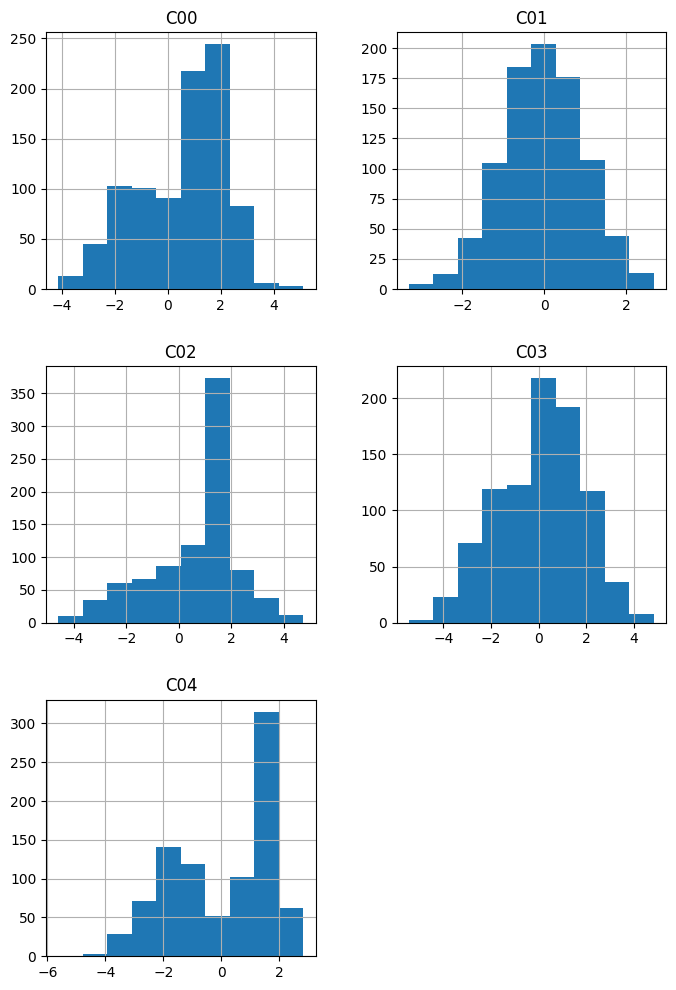

In [53]:
display(f"The shape of the dataset - {X0.shape}")
display(X0.head())
display(X0.hist(figsize=(8, 12)))
plt.show()

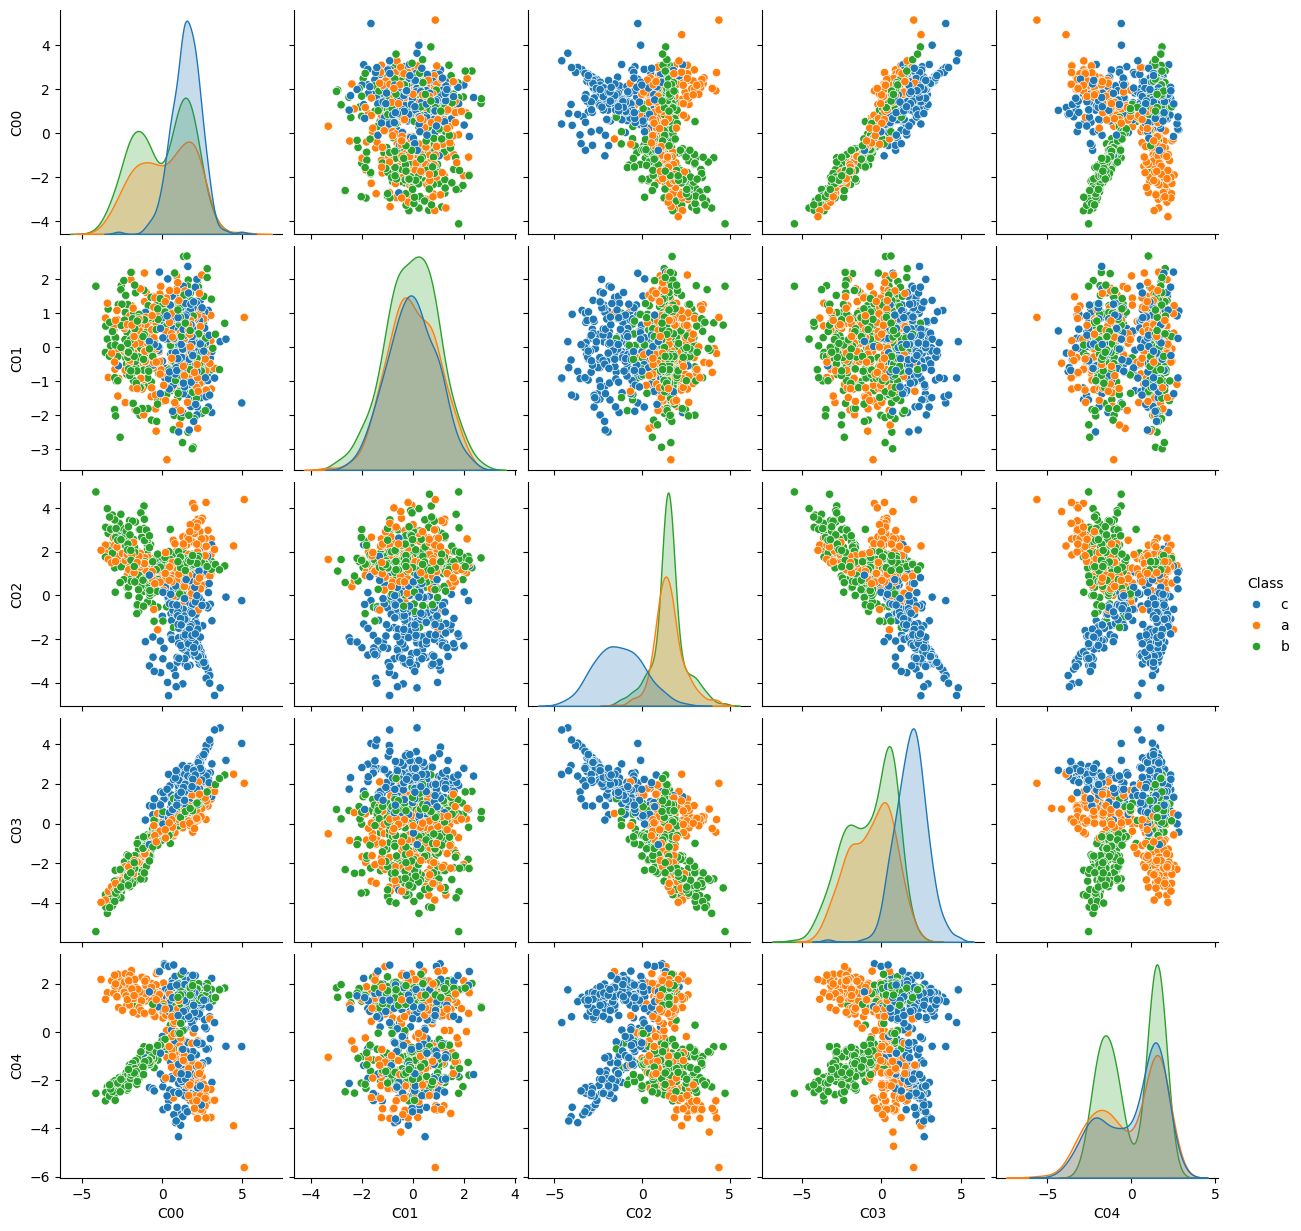

In [54]:
sns.pairplot(X0, hue='Class')
plt.show()

Verify if there are `nan` values in the dataset, and, in case, drop rows with `nan`

In [55]:
print(f"The total number of missing values in the dataset - {X0.isna().sum().sum()}")

The total number of missing values in the dataset - 519


In [56]:
X0.dropna(inplace=True)
print(f"The total number of missing values in the dataset - {X0.isna().sum().sum()}")

The total number of missing values in the dataset - 0


- Split predicting attributes and target into `X` and `y`
- Show the number of samples in train and test, show the number of features

In [57]:
X = pd.DataFrame(X0.drop(columns=[target]))
y = pd.Series(X0[target])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_size, random_state=random_state
)

print(f"Train size - {X_train.shape[0]}, Test size - {X_test.shape[0]}, Features - {X_train.shape[1]}")

Train size - 434, Test size - 145, Features - 5


Optimising the estimator

- determine the range of the parameters for the estimator
- repeatedly fit the estimator with cross validation for each value of the parameter range and find the value of the parameter giving the best accuracy
- print the value of the best parameter


In [86]:
fitted_max_depth = 5
cv = 3

tuned_param_dt = [
    {
        "max_depth": [*range(1, fitted_max_depth + 1)],
        "criterion": ["gini", "entropy"],
        "class_weight": ["balanced", None],
    }
]

In [87]:
clf = GridSearchCV(
    DecisionTreeClassifier(random_state=random_state),
    tuned_param_dt,
    cv=cv,
    scoring="accuracy",
)

In [88]:
clf.fit(X_train, y_train)
print(f"The best parameter value is {clf.best_index_}")

The best parameter value is 19


- fit the estimator using the `train` part
- use the fitted estimator to predict using the test features
- compute the accuracy on the test set and print it with the best parameter value
- print a classification report and the confusion matrix for the test set

In [101]:
y_pred = clf.predict(X_test)
print(f"The accuracy score is {accuracy_score(y_test, y_pred):.2%} with parameter {clf.best_index_}")

The accuracy score is 70.34% with parameter 19


In [95]:
# classification report on test set
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           a       0.75      0.35      0.48        43
           b       0.61      0.92      0.73        59
           c       0.89      0.77      0.82        43

    accuracy                           0.70       145
   macro avg       0.75      0.68      0.68       145
weighted avg       0.74      0.70      0.68       145



In [96]:
# Confusion matrix for test set
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

[[15 27  1]
 [ 2 54  3]
 [ 3  7 33]]
